# Credit Risk Evaluator

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [2]:
# Import the data
lending_data_df = pd.read_csv('Resources/lending_data.csv')
lending_data_df

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

##### Prediction
Both Models will be very successful.
##### Linear
Just by glancing at the dataframe there seems to be a pattern. The top 5 rows have a loan_status of 0 and has smaller numbers across the board. On the other hand, the bottom 5 rows all have a loan_status of 1 and have bigger numbers across the board. Of course, that is only 10 rows, but if there is anything approaching a linear relationship, then the logistic regression model will sniff it out.
##### Random Forest
The Random Forest model should have no problem with such a dataset. With only 7 data columns, feature selection is not neccessary. With only 77,536 rows, any speed and performance disadvantages associated with the Random Forest Model can be ignored as well. My one concern is with 'derogatory_marks'. Because derogatory_marks has only 4 possible values, it may be treated like a categorical variable which can bias the importance variables.

In [3]:
lending_data_df['derogatory_marks'].nunique()

4

## Split the Data into Training and Testing Sets

In [4]:
# Split the data into X_train, X_test, y_train, y_test
y = lending_data_df["loan_status"].values
X = lending_data_df.drop("loan_status", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. Do the same for a Random Forest Classifier. You may choose any starting hyperparameters you like. 

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the designated markdown cell.

In [5]:
# Train a Logistic Regression model and print the model score
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
print(f"Training Data Score: {clf_lr.score(X_train, y_train)}")
print(f"Testing Data Score: {clf_lr.score(X_test, y_test)}")

Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


In [6]:
# Train a Random Forest Classifier model and print the model score
clf_rf_unscaled = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train, y_train)
print(f'Training Score: {clf_rf_unscaled.score(X_train, y_train)}')
print(f'Testing Score: {clf_rf_unscaled.score(X_test, y_test)}')

Training Score: 0.9974893382858715
Testing Score: 0.9910235245563351


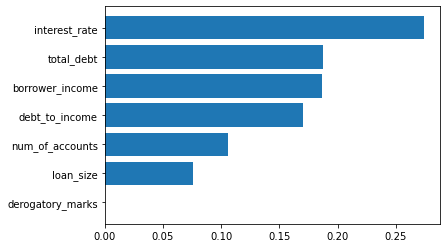

In [11]:
features = sorted(zip(X.columns, clf_rf_unscaled.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]
fig, ax = plt.subplots()
ax.barh(y=cols, width=width)
plt.show()

In [12]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
clf_rf_scaled = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
print(f'Training Score: {clf_rf_scaled.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf_rf_scaled.score(X_test_scaled, y_test)}')

Training Score: 0.9974893382858715
Testing Score: 0.9910751134956666


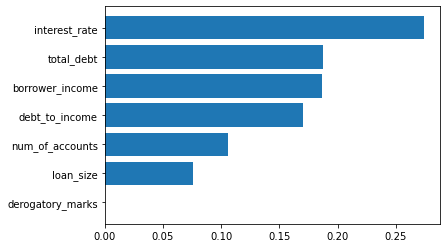

In [14]:
features = sorted(zip(X.columns, clf_rf_scaled.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()
ax.barh(y=cols, width=width)

plt.show()

*Which model performed better? How does that compare to your prediction?

As predicted, both models performed very well; Both greater than 99%.
The random forest model performed marginally better with the training set. Interestingly though, the logistic regression model performed marginally better with the test set.